# **Python Recap**

##### ❓ **Q1** &mdash; Hello, AMLG!

First things first: print the string "`Hello, AMLG!`".

In [44]:
print("Hello, AMLG!")

Hello, AMLG!


# Python 3's f-strings

As of Python 3.6, f-strings are a great new way to format strings.
Not only are they more readable, more concise, and less prone to errors than other ways of formatting, but they are also faster!

Before Python 3.6, you had two main ways of embedding Python expressions inside string literals for formatting: `%`-formatting and `str.format()`.

## `%`-formatting

`%`-formatting (or [`printf`-style formatting](https://docs.python.org/3/library/stdtypes.html#printf-style-string-formatting)) has been in the language since the very beginning.

String objects have a built-in operation using the `%` operator, which you can use to format strings.

Here's how that would look in practice:

In [45]:
name = "Alice"
greeting = "Hello, %s." % name
print(greeting)

Hello, Alice.


To insert more than one variable, you must use a tuple of those variables.

> A [**tuple**](https://docs.python.org/3/library/stdtypes.html#tuple) (see also [this explanation](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences)) is one of Python's standard sequence data types (the other ones being [list](https://docs.python.org/3/library/stdtypes.html#list) and [range](https://docs.python.org/3/library/stdtypes.html#range)).
> It consists of a number of values separated by commas.
> Usually, tuples are enclosed in parentheses (`()`), so that nested tuples are interpreted correctly; they may be input with or without surrounding parentheses, although often parentheses are necessary anyway.
> Though tuples may seem similar to lists, they are often used in different situations and for different purposes.
> Tuples are [immutable](https://docs.python.org/3/glossary.html#term-immutable), and usually contain a heterogeneous sequence of elements.)

##### ❓ **Q2** &mdash; `%`-formatting

Complete the `greeting` using `%`-formatting such that it becomes "`Hello, Alice. You are 42.`".

In [46]:
name = "Alice"
age = 42
greeting = "Hello, %s. You are %d." % (name, age)
print(greeting)

Hello, Alice. You are 42.


## `str.format()`

The code examples that you just saw above are readable enough.
However, once you start using several parameters and longer strings, your code will quickly become much less easily readable.

This newer way of getting the job done&nbsp;&mdash;&nbsp;`str.format()`&nbsp;&mdash;&nbsp;was introduced in Python 2.6.
`str.format()` is an improvement on `%`-formatting.
It uses normal function call syntax and is extensible through the `__format__()` method on the object being converted to a string.

With `str.format()`, the replacement fields are marked by curly braces:

In [47]:
name = "Alice"
age = 42
print("Hello, {}. You are {}.".format(name, age))

Hello, Alice. You are 42.


## F-strings

Code using `str.format()` is much more easily readable than code using `%`-formatting, but `str.format()` can still be quite verbose when you are dealing with multiple parameters and longer strings.

The good news is that f-strings are here to save the day.
They joined the party in Python 3.6.
You can read all about it in [PEP 498](https://peps.python.org/pep-0498/).

Also called "[formatted string literals](https://docs.python.org/3/reference/lexical_analysis.html#f-strings)", f-strings are string literals that have an `f` (it would also be valid to use a capital letter `F`) at the beginning and curly braces containing expressions that will be replaced with their values.
The expressions are evaluated at runtime and then formatted using the `__format__` protocol.

The syntax is similar to the one you used with `str.format()` but less verbose:

In [48]:
name = "Alice"
age = 42
greeting = f"Hello, {name}. You are {age}."
print(greeting)

Hello, Alice. You are 42.


Because f-strings are evaluated at runtime, you can put any valid Python expressions in them.

##### ❓ **Q3** &mdash; Formatting with f-strings

Define and implement the function `to_lowercase()` that converts all cased characters in a string to lowercase.
Hint: use [`str.lower()`](https://docs.python.org/3/library/stdtypes.html?#str.lower).

In [49]:
def to_lowercase(input: str) -> str:
    return input.lower()


name = "Alice Idle"
print(f"{to_lowercase(name)}")

alice idle


##### ❓ **Q4** &mdash; F-strings and classes

You could even use objects created from classes with f-strings.
Implement the [`__str__()`](https://docs.python.org/3/reference/datamodel.html#object.__str__) method of the `Programmer` class.
It shall return a human-readable informal string representation of a `Programmer` object.

In [50]:
class Programmer:
    def __init__(self, first_name: str, last_name: str, age: int) -> None:
        self.first_name = first_name
        self.last_name = last_name
        self.age = age

    def __str__(self) -> str:
        return f"{self.first_name} {self.last_name} is {self.age}."


new_programmer = Programmer(first_name="Alice", last_name="Idle", age=42)
print(f"{new_programmer}")

Alice Idle is 42.


# Variadic functions

When a function has a parameter preceded by an asterisk (`*`), e.g., `*args`, it can accept a variable number of arguments.
And you can pass zero, one, or more arguments to the `*args` parameter.
In Python, the parameters like `*args` are called variadic parameters.
Functions that have variadic parameters are called variadic functions.
Note that you don’t need to use the name `*args` for a variadic parameter.
For example, you can use any meaningful name like `*numbers`, `*strings`, etc.
Inside the function the arguments are accessible as a [tuple](https://docs.python.org/3/library/stdtypes.html#tuple).

##### ❓ **Q5** &mdash; Variadic functions with tuples as arguments

Implement the function `mean()`.
It shall return the arithmetic mean

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$$

of the variable number of elements passed to it.

In [51]:
def mean(*elems: float) -> float:
    """Compute the arithmetic mean of the elements."""
    return sum(elems) / len(elems)


print(f"mean = {mean(0, 1, 2, 3, 4, 5)}")

mean = 2.5


##### ❓ **Q6** &mdash; Variadic functions with dictionaries as arguments

Also, when a function has a parameter preceded by _two_ asterisks (`**`), e.g., `**kwargs` (which stands for "keyword arguments"), it can accept a keyworded variable number of arguments.
Inside the function the arguments are accessible as a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

Implement the function `print_contacts()`.
It shall print the contacts in the following format:

```
Alice: +49 511 123456
Bob: +49 511 654321
```

In [52]:
def print_contacts(**contacts: str) -> None:
    """Print the contacts dictionary."""
    for name, contact in contacts.items():
        print(f"{name}: {contact}")


print_contacts(Alice="+49 511 123456", Bob="+49 511 654321")

Alice: +49 511 123456
Bob: +49 511 654321


# Plotting with `matplotlib`

##### ❓ **Q7** &mdash; Plotting a sine wave

Plot one period of a sine wave using the function [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).
Sample the sine function at 1000 equally-distributed locations in the half-open interval $[0,1)$ ($0$ _is_ inclusive, $1$ is _not_).
Hint: use [`math.sin()`](https://docs.python.org/3/library/math.html#trigonometric-functions) to obtain the sine values at the sample locations.

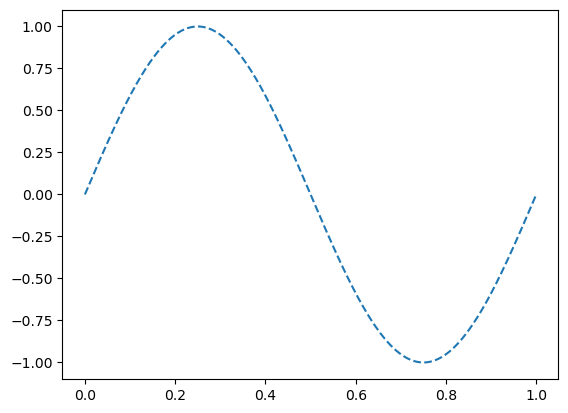

In [53]:
import math
import matplotlib.pyplot as plt

sample_locs = [x / 1000 for x in range(1000)]
sine_vals = [math.sin(2 * math.pi * s) for s in sample_locs]
plt.plot(sample_locs, sine_vals, linestyle="--")
plt.show()

# A first glimpse into the machine learning world with `scikit-learn`'s `DecisionTreeClassifier`

The following example uses the [_Iris_](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset.
This dataset consists of the petal and sepal lengths of three species of _Iris_ (_I. setosa_, _I. versicolor_, _I. virginica_).

<img src="images/Iris_germanica.jpg" width="400" />

> Petals are modified leaves that surround the reproductive parts of flowers.
> Petals are usually accompanied by another set of modified leaves called sepals.

<img src="images/petal-sepal.jpg" width="400" />

The following code is about training a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to classify _Iris_ samples into the species (i.e., classes) according to the dimensions (length, width) of their petals and sepals.

In [54]:
import sklearn.datasets
import sklearn.tree

# This dataset consists of the petal and sepal lengths of three species of Iris
# (I. setosa, I. versicolor, I. virginica) stored in a 150x4 numpy.ndarray.
iris = sklearn.datasets.load_iris()

# Train a decision tree using the entropy as splitting criterion. To obtain a
# deterministic behaviour during fitting we set random_state=0.
clf = sklearn.tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf = clf.fit(X=iris.data, y=iris.target)

##### ❓ **Q8** &mdash; Classifying using a decision tree

Classify the test sample using the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) function of `sklearn.tree.DecisionTreeClassifier`.

In [55]:
test_samples = [[5, 3, 1, 0]]

test_classes = clf.predict(X=test_samples)

print(
    f"The Iris with {iris['feature_names']} = {test_samples[0]} belongs to "
    f"species I. {iris['target_names'][test_classes[0]]}."
)

The Iris with ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] = [5, 3, 1, 0] belongs to species I. setosa.


Finally, we can visualize the learned tree as text:

In [56]:
print(sklearn.tree.export_text(decision_tree=clf, feature_names=iris["feature_names"]))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



Or we can visualize the tree as an image:

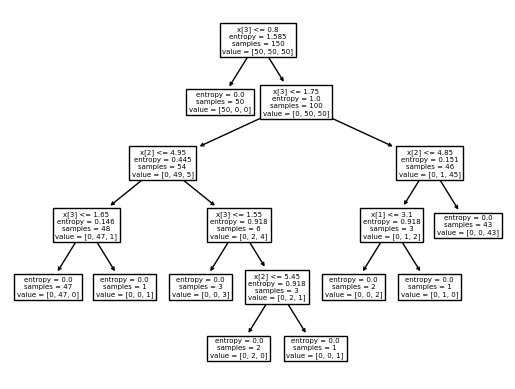

In [57]:
sklearn.tree.plot_tree(decision_tree=clf)
plt.show()